In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\Term 3\Banking analytics\raw-data_assgn_transformed.csv')
data = data[data.columns.difference(['Num','Dev model'])]
data.head()

,Adjusted EPS,Borrowings,Borrowings/Total_Assets,Capital employed,Capital employed/Total assets,Cash profit,Cash profit as % of total income,Cash profit/Total assets,Cash to average cost of sales per day,Cash to current liabilities (times),...,Total Income,Total Income/Total assets,Total assets,Total capital,Total capital/Total_Assets,Total expenses,Total expenses/Total Income,Total liabilities,Total term liabilities / tangible net worth,WIP turnover
0,-13.9632,9485.900,0.471956,11064.50,0.550497,-108.666,-49.9664,-0.005407,8.82,0.00,...,1239.4,0.061664,20099.1,627.200,0.031205,2082.5,1.680249,20099.1,15.49,10.16
1,-13.9632,15257.108,0.454186,14541.12,0.432872,-108.666,-6.6200,-0.003235,0.42,0.00,...,33935.2,1.010211,33592.2,1204.500,0.035857,37897.1,1.116749,33592.2,10.89,127.42
2,-4.5500,7799.500,0.509149,14541.12,0.949240,-108.666,-10.5300,-0.007094,13.01,0.07,...,2387.2,0.155836,15318.7,2975.118,0.194215,3022.2,1.266002,15318.7,6.40,6.95
3,-7.9500,1891.800,0.319313,2311.70,0.390187,-108.666,-3.3200,-0.018341,5.87,0.03,...,4800.8,0.810316,5924.6,419.600,0.070823,5105.3,1.063427,5924.6,2.54,7.42
4,-5.8700,2146.100,0.629023,2759.30,0.808752,-108.666,-4.2100,-0.031850,0.97,0.01,...,3455.2,1.012721,3411.8,1000.000,0.293100,3831.0,1.108764,3411.8,7.11,18.65


In [3]:
data.isnull().sum()

Adjusted EPS                                     0
Borrowings                                       0
Borrowings/Total_Assets                          0
Capital employed                                 0
Capital employed/Total assets                    0
Cash profit                                      0
Cash profit as % of total income                 0
Cash profit/Total assets                         0
Cash to average cost of sales per day            0
Cash to current liabilities (times)              0
Change in stock                                  0
Change in stock/Total Income                     0
Contingent liabilities                           0
Contingent liabilities / Net worth (%)           0
Contingent liabilities/Total Assets              0
Creditors turnover                               0
Cumulative retained profits                      0
Cumulative retained profits/Total Income         0
Current assets                                   0
Current assets/Total_Assets    

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)

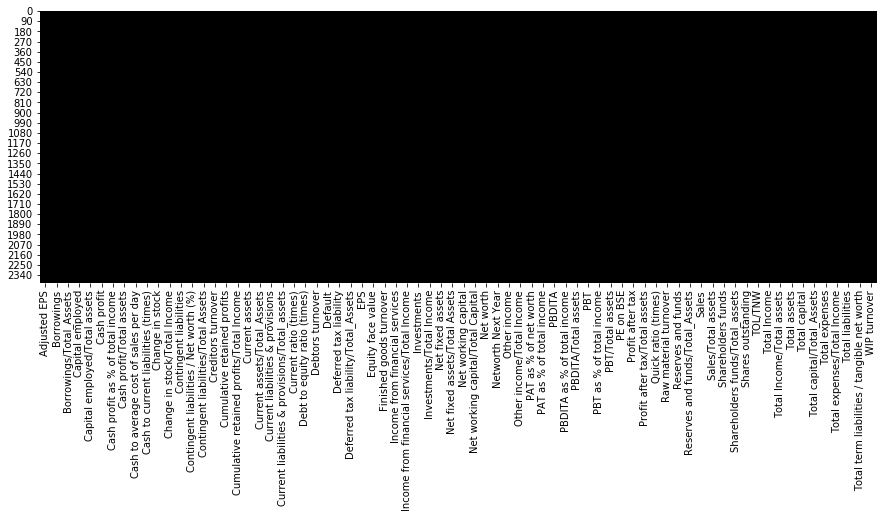

In [31]:
sns.heatmap(data.isnull(),cmap='gnuplot', cbar=False)

In [6]:
from sklearn.preprocessing import power_transform
data_out = power_transform(data.drop('Default',axis = 1), method='yeo-johnson',standardize=True)
data_out[:5]

array([[-3.95302539e+00,  2.23945035e+00,  3.60765891e-01,
         2.05538949e+00, -9.66827026e-01, -5.14877280e+00,
        -2.97724960e+00, -2.30337917e-01,  3.80955905e-03,
        -1.16782351e+00, -2.91425372e-01, -1.54657394e-01,
         1.08469602e+00,  1.73608358e+00, -7.52151906e-01,
        -1.96747892e+00, -4.95065230e+00,  1.98280479e-02,
         1.94971907e+00, -5.91402200e-01,  2.04118742e+00,
         3.47452851e-02, -8.54849674e-01,  2.22475430e+00,
        -2.00869544e+00,  1.43008890e+00, -6.65809626e-01,
        -3.91141130e+00,  5.99136046e-02, -6.10070254e-01,
         3.78764888e-01, -4.80297999e-01,  1.83783982e+00,
         1.21300690e+00,  2.11573159e+00,  1.74835746e-01,
        -4.98133980e+00, -3.81795297e-01,  6.79123544e-01,
        -2.59714806e+01,  5.60616480e-01, -4.59045011e-01,
        -2.96498396e+00, -2.39840089e+00, -4.81060774e+00,
        -1.41862965e+00, -3.03754377e-01, -5.26676837e+00,
        -2.43159077e+00, -1.99389139e-01,  5.87545543e-0

In [7]:
data1 = data_out
data1 = pd.DataFrame(data1, columns=data.drop('Default',axis = 1).columns)

q1 = data1.quantile(0.25)
q3 = data1.quantile(0.75)
IQR = q3-q1

df1 = (data1<(q1-1.5*IQR))|(data1>(q3+1.5*IQR))
for i in df1.columns:
    print(df1[i].value_counts())


False    2025
True      384
Name: Adjusted EPS, dtype: int64
False    2409
Name: Borrowings, dtype: int64
False    2235
True      174
Name: Borrowings/Total_Assets, dtype: int64
False    2409
Name: Capital employed, dtype: int64
False    2409
Name: Capital employed/Total assets, dtype: int64
False    2033
True      376
Name: Cash profit, dtype: int64
False    2180
True      229
Name: Cash profit as % of total income, dtype: int64
False    2218
True      191
Name: Cash profit/Total assets, dtype: int64
False    2409
Name: Cash to average cost of sales per day, dtype: int64
False    2409
Name: Cash to current liabilities (times), dtype: int64
False    2165
True      244
Name: Change in stock, dtype: int64
False    2015
True      394
Name: Change in stock/Total Income, dtype: int64
False    2409
Name: Contingent liabilities, dtype: int64
False    2409
Name: Contingent liabilities / Net worth (%), dtype: int64
False    2409
Name: Contingent liabilities/Total Assets, dtype: int64
False    2

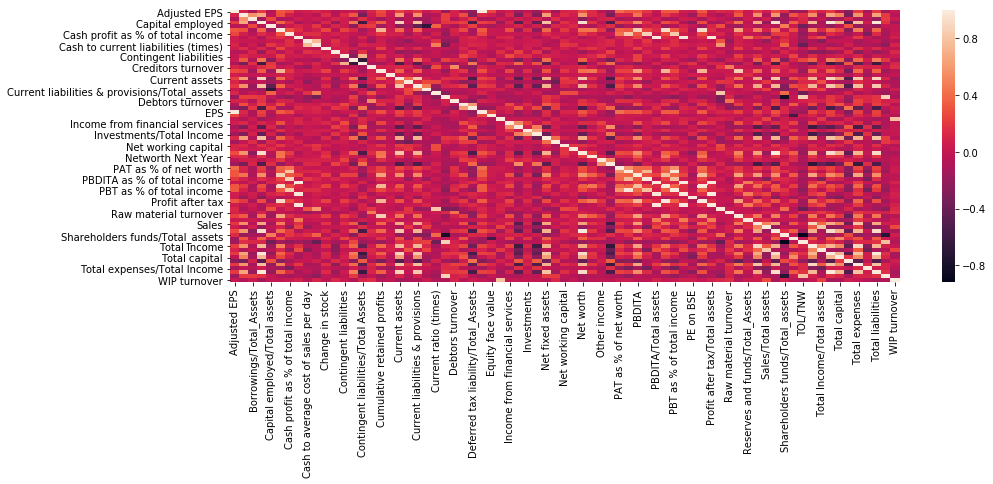

In [8]:
sns.heatmap(data1.corr())

In [9]:
ls = ['Cash to average cost of sales per day', 'Cash to current liabilities (times)', 'Creditors turnover', 
      'Current ratio (times)', 'Debt to equity ratio (times)', 'Debtors turnover', 'Equity face value',
      'Finished goods turnover', 'Net worth', 'Networth Next Year', 'Quick ratio (times)', 'Raw material turnover',
      'Shares outstanding', 'WIP turnover']

In [10]:
data1.head()

,Adjusted EPS,Borrowings,Borrowings/Total_Assets,Capital employed,Capital employed/Total assets,Cash profit,Cash profit as % of total income,Cash profit/Total assets,Cash to average cost of sales per day,Cash to current liabilities (times),...,Total Income,Total Income/Total assets,Total assets,Total capital,Total capital/Total_Assets,Total expenses,Total expenses/Total Income,Total liabilities,Total term liabilities / tangible net worth,WIP turnover
0,-3.953025,2.239450,0.360766,2.055389,-0.966827,-5.148773,-2.977250,-0.230338,0.003810,-1.167824,...,0.465753,-2.194963,2.089213,1.725552,-1.056148,0.807500,1.615582,2.089213,2.068359,-0.226309
1,-3.953025,2.508474,0.314495,2.194211,-1.459422,-5.148773,-0.949389,-0.226108,-1.649609,-1.167824,...,2.478196,-0.135188,2.330212,2.118311,-0.997970,2.621384,0.443493,2.330212,2.022428,2.187451
2,-1.011765,2.129932,0.452862,2.194211,1.593576,-5.148773,-1.154516,-0.233632,0.249917,-0.341941,...,0.822631,-1.849570,1.960150,2.653923,0.381018,1.016049,0.804495,1.960150,1.909029,-0.573818
3,-1.912074,1.359362,-0.093171,1.246443,-1.613894,-5.148773,-0.766485,-0.255766,-0.259994,-0.777274,...,1.224516,-0.398948,1.499742,1.481081,-0.600532,1.321100,0.303254,1.499742,1.510843,-0.514749
4,-1.336009,1.426428,0.711692,1.339039,0.514848,-5.148773,-0.817031,-0.282749,-1.327770,-1.030765,...,1.032487,-0.132190,1.225741,2.006850,0.864685,1.152339,0.422895,1.225741,1.936735,0.346514


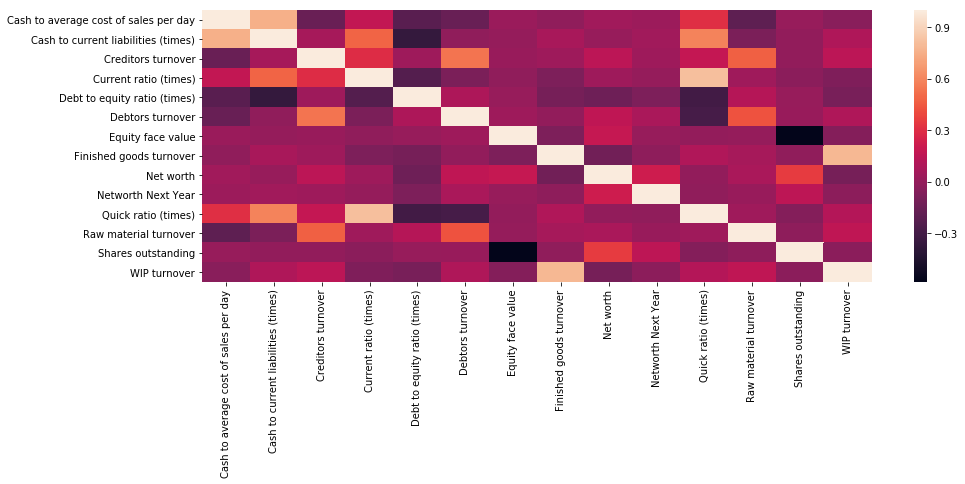

In [11]:
plt.rcParams['figure.figsize'] = (15,5)
sns.heatmap(data1[ls].corr())

In [13]:
ls1 = ['Cash to average cost of sales per day', 'Cash to current liabilities (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Debtors turnover', 'Equity face value', 'Quick ratio (times)',
      'Shares outstanding', 'WIP turnover']

In [14]:
from sklearn.decomposition import PCA
obj = PCA(n_components = 3)

df = pd.DataFrame(obj.fit_transform(data1[data1.columns.difference(ls)]))
df = df.rename(columns={0:'pca1',1:'pca2',2:'pca3'})
df.head()

obj = PCA(n_components = 2)

df1 = pd.DataFrame(obj.fit_transform(data1[ls1]))
df1 = df1.rename(columns={0:'pca4',1:'pca5'})
df1.head()

,pca4,pca5
0,-1.447665,-0.936758
1,-3.680346,-1.343470
2,-1.681307,-1.396901
3,-2.355142,-0.684382
4,-2.308658,-0.766696


In [15]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [16]:
df_final = df.join(df1)
X = df_final
Y = data[['Default']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1234)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1927, 5), (482, 5), (1927, 1), (482, 1))

In [18]:
y_train.head()

,Default
796,0
806,0
2046,0
1861,0
1225,0


In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(y_pred)

## Accuracy of model
print("Logistic regression score = ", lr.score(x_test, y_test))

## Confussion Matrix
cm=confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix is:", cm, sep='\n')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0]
Logistic regression s

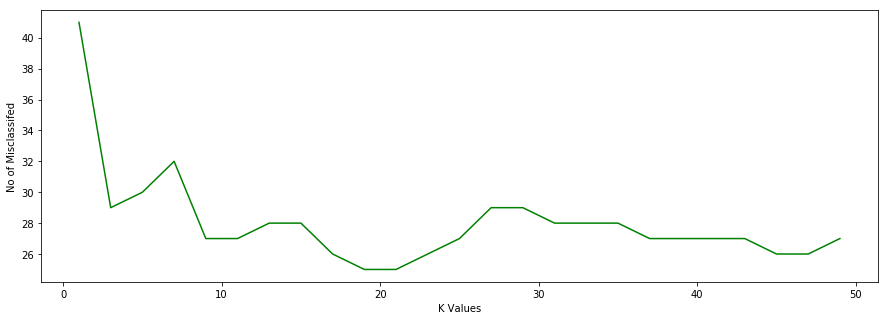

In [21]:
#Building the KNN on normalizated data
from sklearn.neighbors import KNeighborsClassifier

## Finding the k value by ploting the graph

k = list(range(1,50,2))
mis_list = []
dist = {}

for i in k:
    vary_knn = KNeighborsClassifier(n_neighbors=i)
    vary_knn.fit(x_train,y_train)
    
    misclassifer = int(len(x_test) - (vary_knn.score(x_test,y_test)* len(x_test)))
    
    mis_list.append(misclassifer)
    dist[i] = misclassifer
    
plt.plot(k, mis_list, color = 'green')
plt.xlabel("K Values")
plt.ylabel("No of Misclassifed")
plt.show()


In [22]:
print(dist)

{1: 41, 3: 29, 5: 30, 7: 32, 9: 27, 11: 27, 13: 28, 15: 28, 17: 26, 19: 25, 21: 25, 23: 26, 25: 27, 27: 29, 29: 29, 31: 28, 33: 28, 35: 28, 37: 27, 39: 27, 41: 27, 43: 27, 45: 26, 47: 26, 49: 27}


In [23]:
knn = KNeighborsClassifier(n_neighbors=19)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

## Accuracy of model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 94.81327800829875


array([[442,   5],
       [ 20,  15]], dtype=int64)

In [24]:
#Using Naive Bayes (Bernoulli)
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()

bnb.fit(x_train, y_train)

# making predictions on the testing set 
y_pred = bnb.predict(x_test)
print(y_pred)

## Accuracy of model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

## Confussion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
Accuracy:  92.7385892

array([[447,   0],
       [ 35,   0]], dtype=int64)

In [25]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0]
accuracy (in %) 91.70

array([[424,  23],
       [ 17,  18]], dtype=int64)

In [35]:
#Random-Forest Algorithm, AdaBoost-Classified, Gradient Boosting Classifier, XGBClassifier¶
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# n_estimators indicates the number of trees in the forest
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
accuracy 94.190871369

array([[439,   8],
       [ 20,  15]], dtype=int64)

In [34]:
## Fit a AdaBoost model
ab = AdaBoostClassifier(n_estimators=100)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0]
accuracy 92.946058091

array([[434,  13],
       [ 21,  14]], dtype=int64)

In [33]:
#Fit a Gradient Boosting model,

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0]
accuracy 93.775933609

array([[436,  11],
       [ 19,  16]], dtype=int64)

In [32]:
# XGBClassifier model

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0]
accuracy 93.568464730

array([[437,  10],
       [ 21,  14]], dtype=int64)